**D1DAE: Análise Estatística para Ciência de Dados (2021.1)** <br/>
IFSP Campinas

Profs: Ricardo Sovat, Samuel Martins <br/><br/>

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# Regressão Linear Simples

## 1. Explorando o Dataset

Dataset fictício criado para explicar regressão linear simples. <br/>
https://www.kaggle.com/karthickveerakumar/salary-data-simple-linear-regression
    
O arquivo considerado neste notebook corresponde a tal dataset apenas com as linhas embaralhadas.

### 1.1. Importando o Dataset

In [3]:
df = pd.read_csv('./datasets/experience_salary_dataset.csv')

In [5]:
df.head()

,YearsExperience,Salary
0,8.7,109431.0
1,5.3,83088.0
2,9.0,105582.0
3,6.0,93940.0
4,9.6,112635.0


In [7]:
df.columns = ['Anos de Experiencia', 'Salario']
df.head()

,Anos de Experiencia,Salario
0,8.7,109431.0
1,5.3,83088.0
2,9.0,105582.0
3,6.0,93940.0
4,9.6,112635.0


### 1.2. Informações básicas do dataset

In [23]:
print(f'O dataset possui {df.shape[0]} exemplos/amostras/linhas e {df.shape[1]} atributos/variáveis/colunas')

O dataset possui 30 exemplos/amostras/linhas e 2 atributos/variáveis/colunas


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Anos de Experiencia  30 non-null     float64
 1   Salario              30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


### 1.3. Estatísticas Descritivas

In [10]:
df.describe()

,Anos de Experiencia,Salario
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


Text(0.5, 1.0, 'Boxplot dos Salarios')

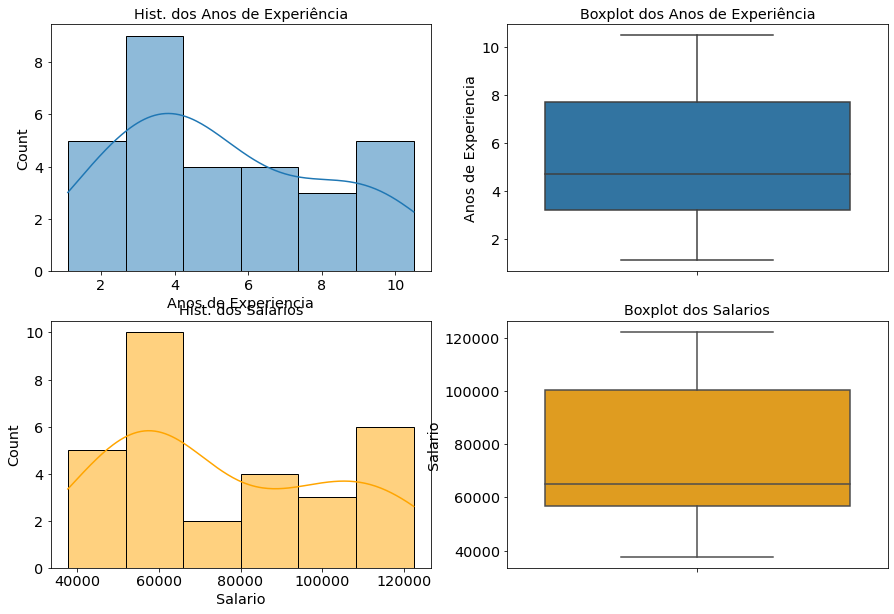

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(data=df, x='Anos de Experiencia', kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Hist. dos Anos de Experiência')

sns.boxplot(data=df, y='Anos de Experiencia', ax=axes[0, 1])
axes[0, 1].set_title('Boxplot dos Anos de Experiência')

sns.histplot(data=df, x='Salario', kde=True, ax=axes[1, 0], color='orange')
axes[1, 0].set_title('Hist. dos Salarios')

sns.boxplot(data=df, y='Salario', ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Boxplot dos Salarios')

### 1.4. Matriz de correlação

O **coeficiente de correlação** é uma medida que mede a associação linear entre duas variáveis. Seu valor varia de **_-1_** (associação negativa perfeita) e **_+1_** (associação positiva perfeita).
<img src="imgs/correlation_coefficient.png" width="70%" />
Fonte: https://dataz4s.com/statistics/correlation-coefficient/

In [24]:
df.corr()

,Anos de Experiencia,Salario
Anos de Experiencia,1.000000,0.978242
Salario,0.978242,1.000000


<AxesSubplot:xlabel='Anos de Experiencia', ylabel='Salario'>

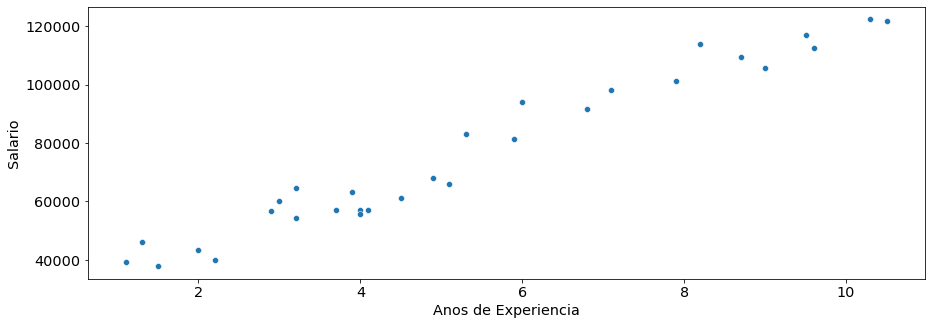

In [26]:
sns.scatterplot(data=df, x='Anos de Experiencia', y='Salario')

<AxesSubplot:xlabel='Anos de Experiencia', ylabel='Salario'>

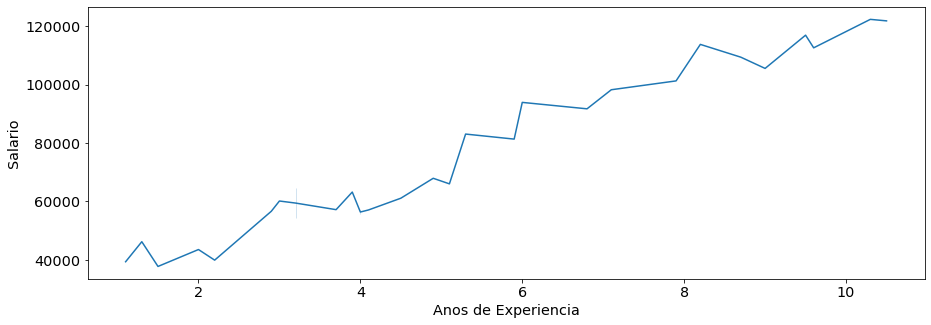

In [27]:
sns.lineplot(data=df, x='Anos de Experiencia', y='Salario')

## 2. Variável Dependente (y) vs Variáveis Independentes/Explicativas (X)

### `pairplot`

Plota o relacionamento entre pares de variáveis em um dataset.

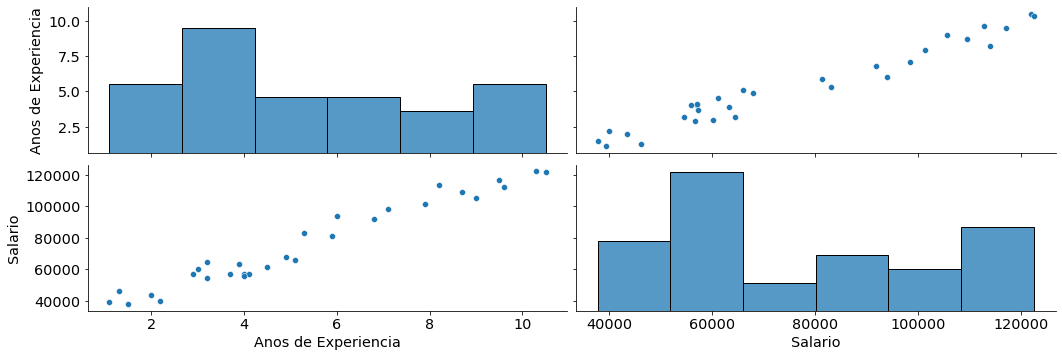

In [28]:
sns.pairplot(df, aspect=3)

### `jointplot`
Plota o relacionamento entre duas variáveis e suas respectivas distribuições de frequência.

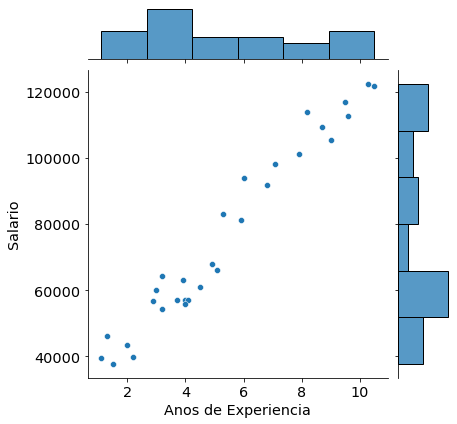

In [29]:
sns.jointplot(data=df, x='Anos de Experiencia', y='Salario')

### `jointplot` com o modelo de regressão linear estimado

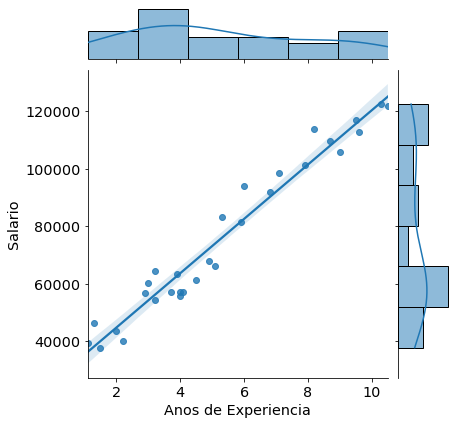

In [30]:
sns.jointplot(data=df, x='Anos de Experiencia', y='Salario', kind='reg')

### `lmplot`
Plota a reta de regressão entre duas variáveis juntamente com suas respectivas dispersões.

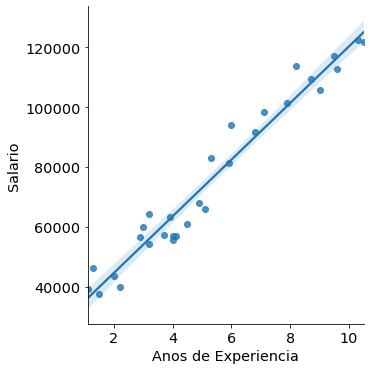

In [33]:
sns.lmplot(data=df, x='Anos de Experiencia', y='Salario')

## 3. Estimando um modelo de regressão linear

A **regressão linear** é uma abordagem para modelar o relacionamento entre variáveis independentes (explicativas) e dependentes numéricas, ajustando um modelo linear (p. ex., uma reta) para as observações de um conjunto treinamento.

Tal modelo linear é usado para a prever variáveis dependentes numéricas a partir das variáveis independentes de novas observações (ainda não vistas).

### 3.1. Extraindo as variáveis independentes e dependentes

In [35]:
df.head()

,Anos de Experiencia,Salario
0,8.7,109431.0
1,5.3,83088.0
2,9.0,105582.0
3,6.0,93940.0
4,9.6,112635.0


#### Criando um DataFrame para armazenar as variáveis independentes/explicativas (X)

In [39]:
X = df[['Anos de Experiencia']]

In [41]:
X.head()

,Anos de Experiencia
0,8.7
1,5.3
2,9.0
3,6.0
4,9.6


In [43]:
X.shape

(30, 1)

#### Criando uma Series para armazenar a variável dependente (y)

In [45]:
y = df['Salario']

In [46]:
y

0     109431.0
1      83088.0
2     105582.0
3      93940.0
4     112635.0
5      56642.0
6      56957.0
7      63218.0
8      54445.0
9      64445.0
10     39891.0
11     81363.0
12     57081.0
13     60150.0
14     66029.0
15    121872.0
16     37731.0
17     39343.0
18     43525.0
19    113812.0
20     57189.0
21    116969.0
22     46205.0
23     55794.0
24     91738.0
25     67938.0
26     61111.0
27    122391.0
28     98273.0
29    101302.0
Name: Salario, dtype: float64

### 3.2. Dividindo o dataset em Conjunto de Treinamento e Conjunto de Teste

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
test_size = 0.2  # taxa de amostras/exemplos que serão amostras/exemplos de teste ==> 20%
seed = 999

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

#### Verificando os tamanhos dos conjuntos de treino e teste

In [49]:
X.shape, y.shape

((30, 1), (30,))

In [51]:
X_train.shape, y_train.shape

((24, 1), (24,))

In [52]:
df.head()

,Anos de Experiencia,Salario
0,8.7,109431.0
1,5.3,83088.0
2,9.0,105582.0
3,6.0,93940.0
4,9.6,112635.0


In [54]:
X_test.shape, y_test.shape

((6, 1), (6,))

### 3.3. Treinando o modelo de Regressão Linear Simples com o Conjunto de Treinamento

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
regressor = LinearRegression()

In [57]:
# treinando nosso regressor linear simples
regressor.fit(X_train, y_train)  # fit ==> ajustar

LinearRegression()

In [58]:
regressor.intercept_  # b0

26555.24919634316

In [59]:
regressor.coef_  # b1

array([9300.51639707])

A partir do conjunto de treinamento estabelecido, nossa reta é então: <br/>
**h(x) = 26555.24919634316 + 9300.51639707 * x**

O salário anual predito de um trabalhador **sem experiência (zero anos)** é de $ 26555.24 (_intercepto b0_).

**Para cada ano adicional de experiência**, o salário anual do trabalhador cresce em $ 9300.51 (_inclinação da reta - b1_).

### 3.4. Coeficiente de determinação (R²) do modelo linear estimado com o Conjunto de Treinamento

#### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entre 0 e 1. <br/>
Ele expressa a proporção de variância dos dados que é explicada pelo modelo linear. <br/>
P. ex: R² = 0,8234 significa que o modelo linear explica 82,34% da variância da variável dependente a partir do regressores (variáveis independentes) incluídas naquele modelo linear.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [60]:
regressor.score(X_train, y_train)

0.9630230431561755

## 4. Predizendo os Salários para as Amostras/Exemplos de Teste

### 4.1. Predição

In [61]:
X_test

,Anos de Experiencia
14,5.1
21,9.5
29,7.9
23,4.0
3,6.0
24,6.8


In [62]:
y_test  # "gabarito" ==> valor real que queremos estimar (ou chegar perto) com nosso modelo linear

14     66029.0
21    116969.0
29    101302.0
23     55794.0
3      93940.0
24     91738.0
Name: Salario, dtype: float64

In [63]:
y_pred = regressor.predict(X_test)
y_pred

array([ 73987.88282139, 114910.15496848, 100029.32873317,  63757.31478461,
        82358.34757875,  89798.7606964 ])

In [64]:
resultados = pd.DataFrame({
    'Anos de Experiencia': X_test['Anos de Experiencia'],
    'Salario (Real)': y_test,
    'Salario (Predicao)': y_pred,
    'Erro (resíduo)': y_test - y_pred,
    'Erro Absoluto': abs(y_test - y_pred)
})

In [65]:
resultados

,Anos de Experiencia,Salario (Real),Salario (Predicao),Erro (resíduo),Erro Absoluto
14,5.1,66029.0,73987.882821,-7958.882821,7958.882821
21,9.5,116969.0,114910.154968,2058.845032,2058.845032
29,7.9,101302.0,100029.328733,1272.671267,1272.671267
23,4.0,55794.0,63757.314785,-7963.314785,7963.314785
3,6.0,93940.0,82358.347579,11581.652421,11581.652421
24,6.8,91738.0,89798.760696,1939.239304,1939.239304


**Resíduos** são um medida de quão longe as predições estão do modelo linear (reta).

### 4.2. Visualizando os Registros com o Modelo Linear

### 4.3. Visualizando os Erros do Teste

## 5. Medindo a "Acurácia" das Predições  - Métricas de Erro para Regressão

Quanto as predições obtidas se diferem dos dados reais?

### Mean Absolute Error (MAE)
$$MAE = \frac{\sum_{i=1}^{n}|y_i - \hat{y}_i|}{n}$$

### Mean Squared Error (MSE)
$$MSE = \frac{\sum_{i=1}^{n}(y_i-\hat{y}_i)^2}{n}$$

Uma vez que os **erros** são elevados ao quadrado antes do cômputo do _erro médio_, o MSE dá maior peso para **erros grandes**, do que o MAE.

## Root Mean Squared Error (RMSE)
$$RMSE = \sqrt{MSE} = \sqrt{\frac{\sum_{i=1}^{n}(y_i-\hat{y}_i)^2}{n}}$$

Está é a métrica comumente usada para comparar modelos de regressão.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

In [ ]:
# squared: bool, default=True
## If True returns MSE value, if False returns RMSE value.



# Exercício

Conside o dataset indicado abaixo que contém **alturas** (em inches/polegadas) e **pesos** (em pounds/libras) de pessoas fictícias. <br/>
https://www.kaggle.com/mustafaali96/weight-height

Realize as seguintes tarefas:
- Divida o conjunto de dados em 80% para treinamento e 20% para teste
- Compute a correlação entre as variáveis do conjunto de treinamento
- Treine um modelo de regressão
  + Compute o coeficiente de determinação do modelo
  + Plote um scatterplot das duas variáveis contendo o modelo de regressão (reta)
- Faça a predição do conjunto de teste
  + Plote um scatterplot das duas variáveis contendo o modelo de regressão (reta)
  + Compute as métricas de erro para regressão